In [1]:
hearing_data <- read.csv("data//hearing_f.csv")
hearing_data

Animal,Taxonomy,best_hearing_min,best_hearing_max,hearing_min,hearing_max,Source.hearing,voc_min,voc_max,Source.voc,clicks_min,clicks_max,X
<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>
North Atlantic right whale,Baleen whales,NA,NA,10,22000,"Parks et al., 2007",300,600,"Vabderlaan et al., 2003",NA,NA,NA
Sperm whale,Toothed whales,5000,20000,100,60000,"Ridgway and Carter, 2001; Siebert et al., 2018",100,30000,"Siebert et al., 2018",5000,24000,"Madsen et al., 2002 in Morisaka & Connor, 2007"
Beluga whale,Toothed whales,32000,76000,1300,150000,"Sysueva, 2018; Mooney et al, 2018; Garland et al., 2015",1300,5700,"Garland et al., 2015",46600,125700,"Nakamura 1999 in Morisaka & Connor, 2007"
Killer whale,Toothed whales,5000,81000,600,114000,"Branstetter et al., 2017",1500,18000,"Siebert et al., 2018",45000,80000,"Au et al., 2004 in Morisaka & Connor, 2007"
Pilot whale,Toothed whales,11200,50000,320,64000,"Pacini et al., 2010; Siebert et al., 2018; Randall et al., 1999 in Morisaka & Connor, 2007",320,21200,"Siebert et al., 2018; Randall et al., 1999 in Morisaka & Connor, 2007",NA,NA,NA
Bottlenose dolphin,Toothed whales,20000,130000,940,180000,"Finneran et al., 2008; Diaz Lopez, Bernal Shirai, 2009; Wang et al., 1995 cited in Morisaka & Connor, 2007",940,23000,"Diaz Lopez, Bernal Shirai, 2009; Wang et al., 1995 cited in Morisaka & Connor, 2007",34500,131900,"Nakamura, 1999 in Morisaka & Connor, 2007"
Risso’s dolphin,Toothed whales,22000,90000,1900,110000,"Nachtigall et al., 2005;Corkeron & van Parijs, 2001; Rendell et al., 1999 in Morisaka & Connor, 2007",1900,23800,"Corkeron & van Parijs, 2001; Rendell et al., 1999 in Morisaka & Connor, 2007",30000,100000,"Philips et al., 2003 in Morisaka & Connor, 2007"
Striped dolphin,Toothed whales,29000,123000,500,160000,"Kastelein et al., 2003",8100,14800,"Oswald et al., 2003 in Morisaka & Connor, 2007",300,100000,"Kastelein et al., 2003"
Harbour porpoise,Toothed whales,16000,140000,2500,180000,"Kastelein et al., 2002",NA,NA,NA,118900,128400,"Au et al., 1999 in Morisaka & Connor, 2007"


Warning message:
“Removed 2 rows containing missing values (geom_linerange).”
Warning message:
“Removed 8 rows containing missing values (geom_linerange).”


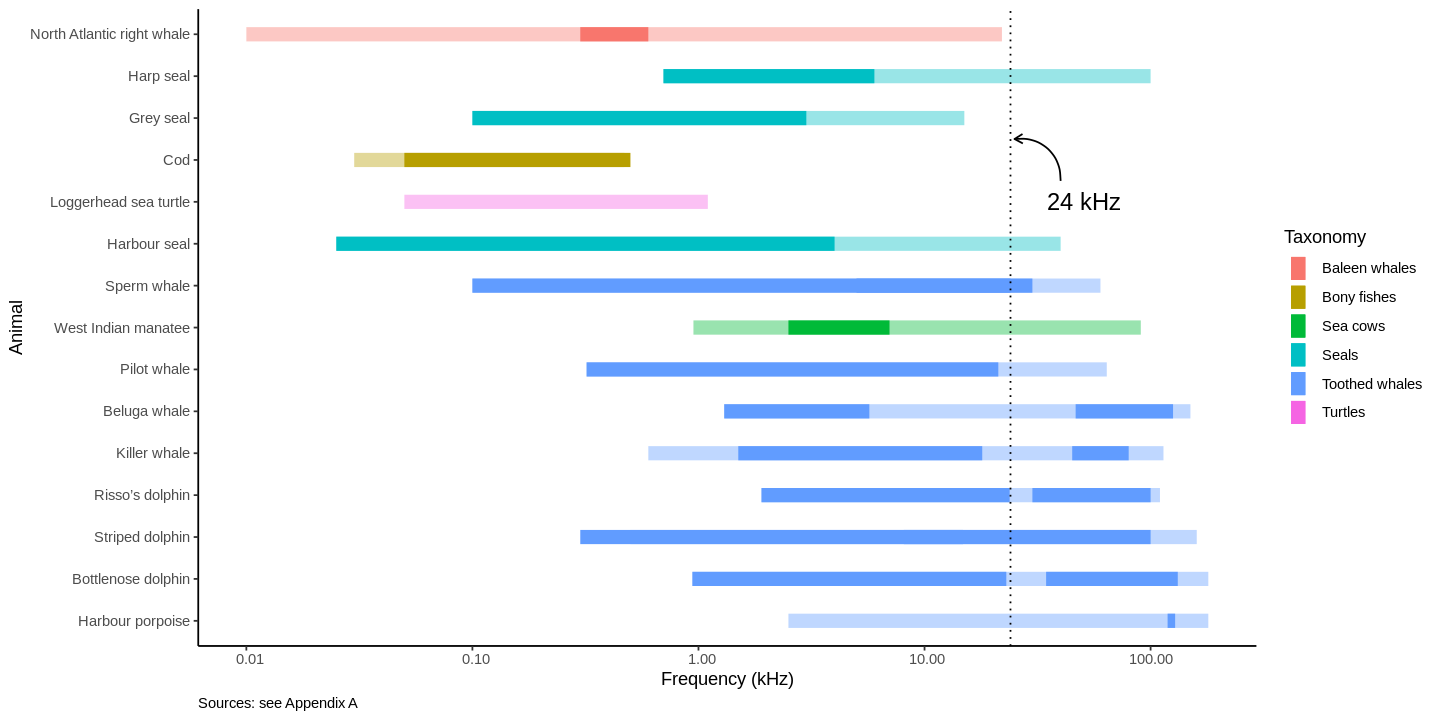

In [7]:
# load libraries
library(ggplot2)
library(repr)

# image aspect ratio
options(repr.plot.width=12, repr.plot.height=6)

# ranges, sorted by best hearing frequency, ascending
hearing_plot <- ggplot(hearing_data)

# full hearing ranges
hearing_plot <- hearing_plot + 
    geom_linerange(
        size = 4, 
        alpha=.4, 
        aes(
            x=reorder(Animal, -best_hearing_max), 
            ymin = hearing_min/1000, 
            ymax = hearing_max/1000, 
            color = Taxonomy))

# vocalization ranges
hearing_plot <- hearing_plot + 
    geom_linerange(
        size = 4, 
        aes(
            x=reorder(Animal, -best_hearing_max), 
            ymin = voc_min/1000, 
            ymax = voc_max/1000, 
            color = Taxonomy))

# click ranges for dolphins
hearing_plot <- hearing_plot + 
    geom_linerange(
        size = 4, 
        aes(
            x=reorder(Animal, -best_hearing_max), 
            ymin = clicks_min/1000, 
            ymax = clicks_max/1000, 
            color = Taxonomy))

# axes and labels
hearing_plot <- hearing_plot + 
    scale_y_log10(labels = function(x) format(x, scientific = FALSE)) +
    labs(
        x="Animal",
        y="Frequency (kHz)", 
        caption="Sources: see Appendix A") +
    coord_flip()

# theme and caption
hearing_plot <- hearing_plot + 
    theme_classic() +
    theme(plot.caption = element_text(hjust=0))

# annotations
hearing_annotated_plot <- hearing_plot + 
    geom_hline(yintercept = 24, linetype=3) + # coords are flipped
    annotate("text", x=11, y=24, label="24 kHz", hjust=-0.5, size=5) +
    annotate("curve", 
             x=11.5, y=40, xend=12.5, yend=25, 
             arrow=arrow(length=unit(0.2, "cm")))

#png("images/hearing_ranges.png", width=1280, height=640, res=120)
hearing_annotated_plot
#dev.off()